# V-10 flight simulation
This notebook is being developed by the avionics and flight dynamics sub-teams in The Rocket Launchers student organization at the University of Texas Rio Grande Valley. Our rocket's name is V-10 in celebration of our club's 10th anniversary! V-10 will be competing in the 10k COTS division at IREC. 

Key features of V-10:
- Air brakes
- vonKarman Nose Cone
- Replaceable fins


In [19]:
from rocketpy import Environment, SolidMotor, Rocket, Flight, TrapezoidalFins, EllipticalFins, RailButtons, NoseCone, Tail, Parachute
import datetime


## Environment


In [12]:
env = Environment()
env.set_location(latitude=28.61, longitude=-80.6)
env.set_elevation(1402.0800000000002)


Optionally, you can set the date and atmospheric model


In [13]:
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))
# env.set_atmospheric_model(type='Forecast', file='GFS')


Gravity Details

Acceleration of gravity at surface level:    9.7760 m/s²
Acceleration of gravity at  80.000 km (ASL): 9.5379 m/s²


Launch Site Details

Launch Date: 2025-10-29 12:00:00 UTC
Launch Site Latitude: 28.61000°
Launch Site Longitude: -80.60000°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 166021.44 W|E    0.00 N
Launch Site UTM zone: 31N
Launch Site Surface Elevation: 1402.1 m


Atmospheric Model Details

Atmospheric Model Type: standard_atmosphere
standard_atmosphere Maximum Height: 80.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 0.00 m/s
Surface Wind Direction: 0.00°
Surface Wind Heading: 0.00°
Surface Pressure: 855.75 hPa
Surface Temperature: 279.05 K
Surface Air Density: 1.068 kg/m³
Surface Speed of Sound: 334.54 m/s


Earth Model Details

Earth Radius at Launch site: 6378.14 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034



Gravity Model Plots


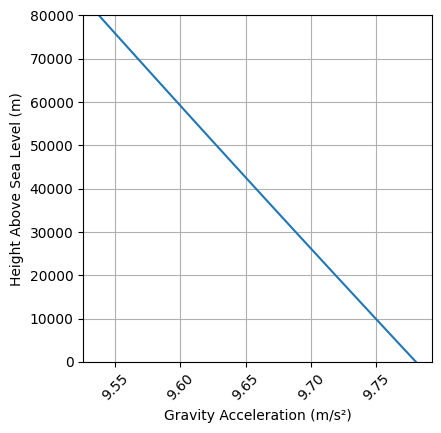



Atmospheric Model Plots


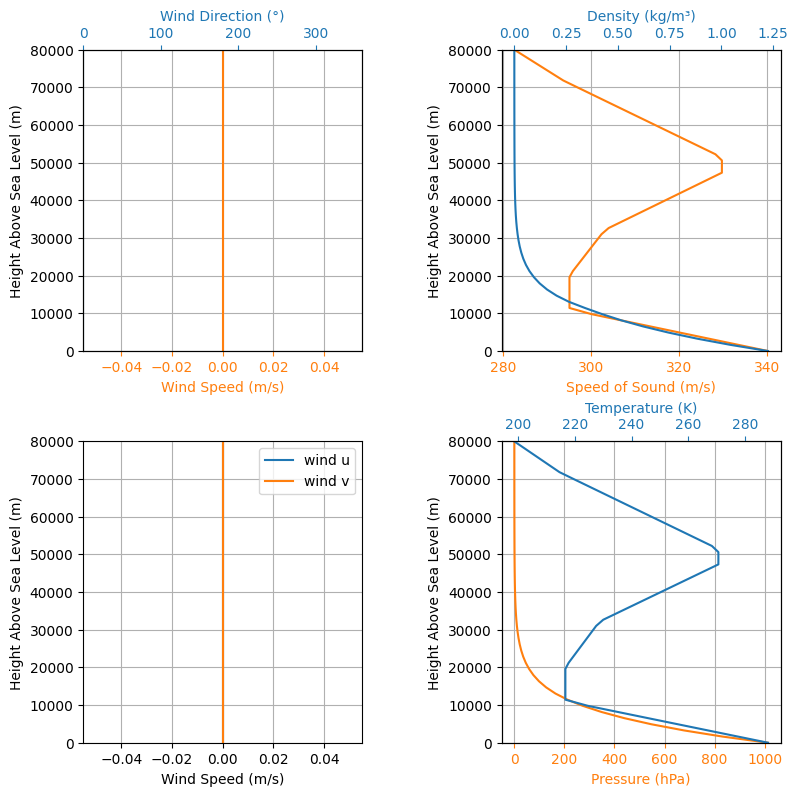

In [14]:
env.all_info()


## Motor
We are using an Aerotech M2500T

We are using thrust info from here <https://www.thrustcurve.org/motors/AeroTech/M2500T/>

  	This File 	Certified 	±
Diameter 	98 mm 	98 mm 	=
Length 	732 mm 	751 mm 	−3%
Prop. Weight 	4,711 g 	4,711 g 	=
Total Weight 	8,064 g 	8,064 g 	=
Avg. Thrust 	2,488.0 N 	2,500.0 N 	=
Max. Thrust 	4,080.5 N 	3,710.9 N 	+10%
Total Impulse 	9,055.9 Ns 	9,671.0 Ns 	−6%
Burn Time 	3.6 s 	3.9 s 	−5%

In [15]:
m2500t = SolidMotor(
    thrust_source='/Users/luis/Projects/Python/RL-RocketPy-Notebook/data/AeroTech_M2500T.eng',
    dry_mass=3.353,  # Total 8.064 kg - Propellant 4.711 kg per cell 8
    center_of_dry_mass_position=0,
    dry_inertia=[0, 0, 0],
    grains_center_of_mass_position=0,
    grain_number=1,
    # Set density to match 4.711 kg propellant mass given geometry
    grain_density=1137.5,
    grain_outer_radius=0.049,  # 98 mm diameter
    grain_initial_inner_radius=0.0245,
    grain_initial_height=0.732,  # Length per cell 8
    grain_separation=0,
    nozzle_radius=0.036750000000000005,
    nozzle_position=-0.351,
    throat_radius=0.0245,
    reshape_thrust_curve=False,  # Not implemented in Rocket-Serializer
    interpolation_method='linear',
    coordinate_system_orientation='nozzle_to_combustion_chamber',
)

Nozzle Details
Nozzle Radius: 0.036750000000000005 m
Nozzle Throat Radius: 0.0245 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 1137.5 kg/m3
Grain Outer Radius: 0.049 m
Grain Inner Radius: 0.0245 m
Grain Height: 0.732 m
Grain Volume: 0.004 m3
Grain Mass: 4.710 kg

Motor Details
Total Burning Time: 3.9021 s
Total Propellant Mass: 4.710 kg
Structural Mass Ratio: 0.416
Average Propellant Exhaust Velocity: 1922.523 m/s
Average Thrust: 2320.807 N
Maximum Thrust: 4080.53093197668 N at 2.40567201759911 s after ignition.
Total Impulse: 9056.021 Ns



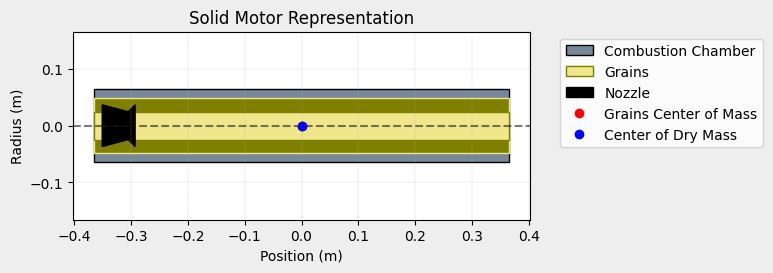

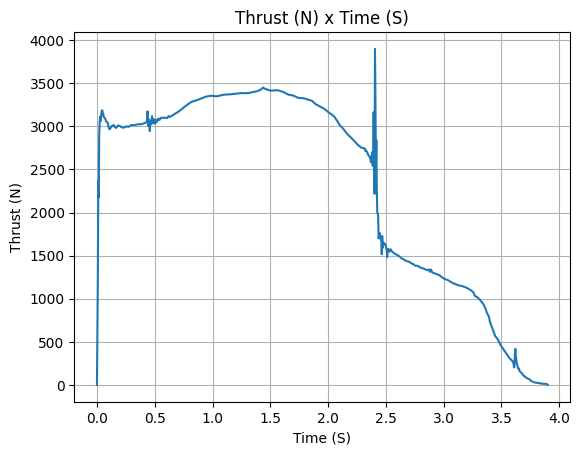

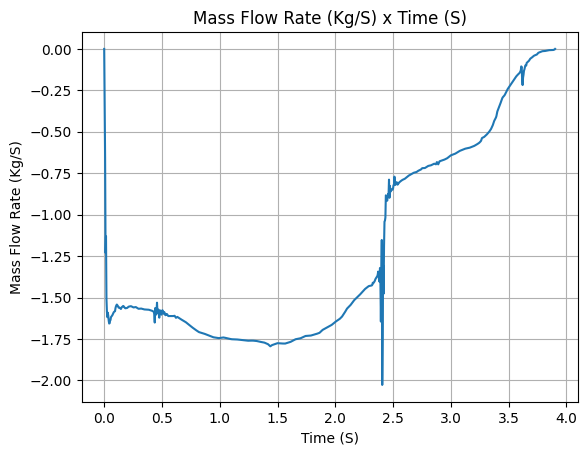

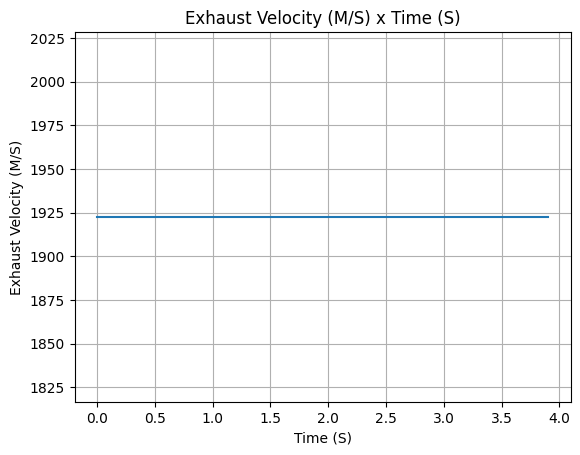

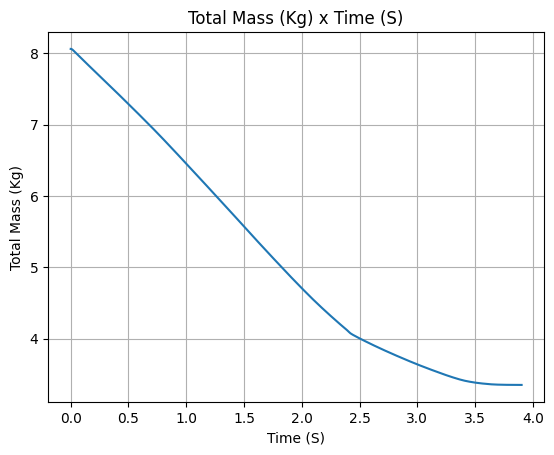

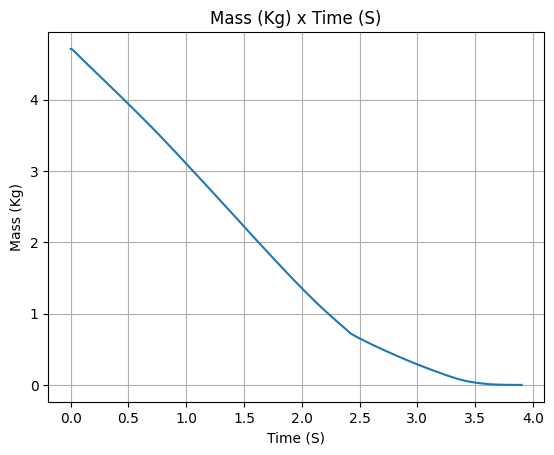

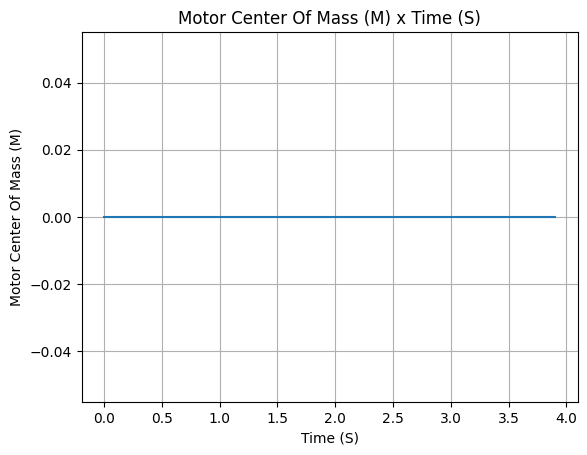

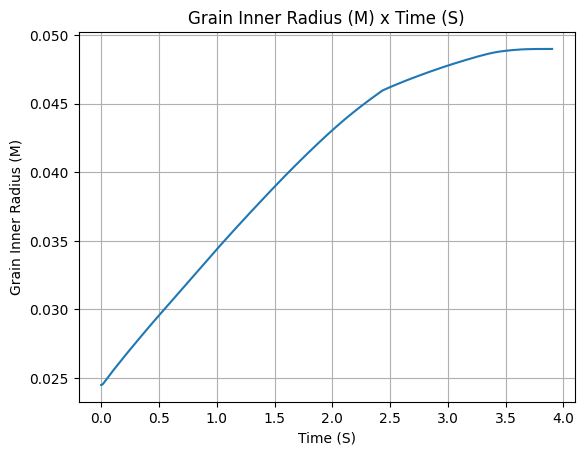

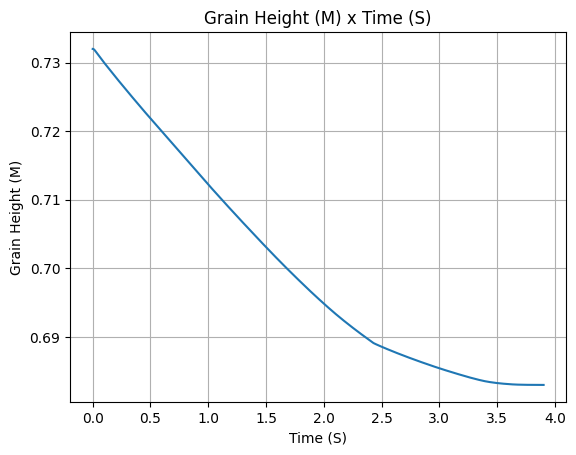

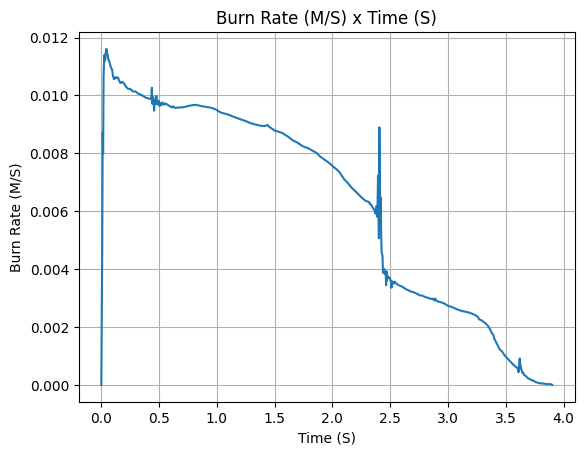

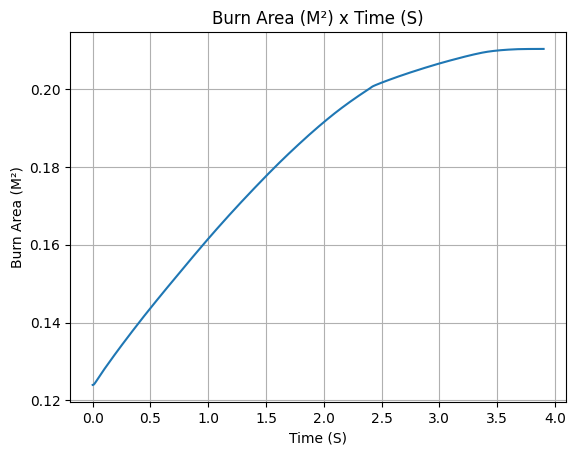

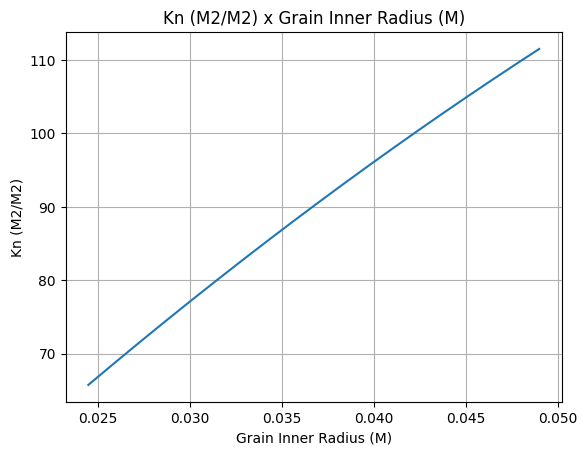

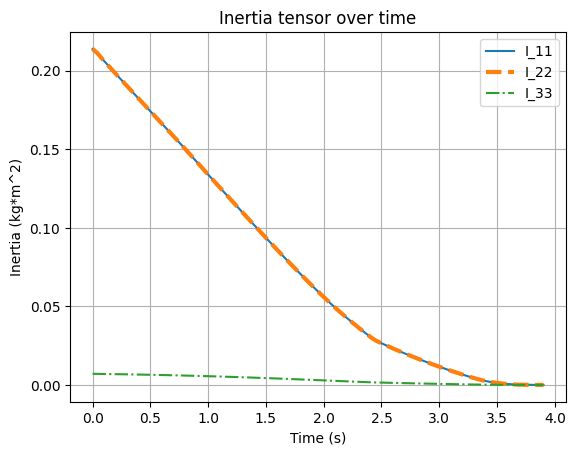

In [16]:
m2500t.all_info()


## Rocket
Currently, only single stage rockets are supported by Rocket-Serializer
We will start by defining the aerodynamic surfaces, and then build the rocket.


### Nosecones
From the V-10 model:
- Type: Haack (Von Kármán equivalent)
- Length: 0.381 m
- Base radius: 0.0777875 m

We'll use RocketPy's Von Karman nose cone with these dimensions.

In [17]:
nosecone = NoseCone(
    length=0.381,
    kind='Von Karman',
    base_radius=0.0777875,
    rocket_radius=0.0777875,
    name='Nose Cone',
)


### Fins
Using dimensions extracted from the V-10 OpenRocket model, we approximate the freeform fin set as trapezoidal fins in RocketPy:

- Count: 4 fins
- Root chord: 0.3048 m
- Tip chord: 0.01905 m (from V-10 fin points)
- Span: 0.1524 m
- Leading-edge sweep length: 0.254 m

These values were derived from the V-10 fin points: (0.0, 0.0), (0.254, 0.1524), (0.27305, 0.1524), (0.3048, 0.0).

In [20]:
fins = TrapezoidalFins(
    n=4,
    root_chord=0.3048,
    tip_chord=0.01905,
    span=0.1524,
    sweep_length=0.254,
    rocket_radius=0.0777875,
    name="CF Trapezoidal (approx from V-10)",
)

### Transitions (Tails)
Boat tail per V-10:
- Shape: Conical
- Length: 0.0508 m
- Fore (top) radius: 0.0777875 m (matches body)
- Aft (bottom) radius: 0.0635 m

We'll create this as a Tail surface and add it to the rocket at the aft end.

In [ ]:
tails = {}


In [ ]:
tails[0] = Tail(
    top_radius=0.0777875,
    bottom_radius=0.0635,
    length=0.0508,
    rocket_radius=0.0777875,
    name='Boat Tail',
)


### Parachutes
Using the V-10 model data and converting diameter to CdS (CdS = CD × area):
- Main: CD = 2.2, Diameter = 2.7432 m → area ≈ 5.909 m² → CdS ≈ 13.0 (we use 13.003)
- Drogue: CD = 2.2, Diameter = 0.6096 m → area ≈ 0.2918 m² → CdS ≈ 0.642

We trigger the main by altitude (396.24 m) and the drogue at apogee.

In [ ]:
parachutes = {}


In [ ]:
parachutes[0] = Parachute(
    name='Main Parachute + Bag',
    cd_s=13.003,
    trigger=396.240,
    sampling_rate=100, 
)


In [ ]:
parachutes[1] = Parachute(
    name='Drogue',
    cd_s=0.642,
    trigger='apogee',
    sampling_rate=100, 
)


In [ ]:
import numpy as np

# Generic Cd vs Mach curves (not from OpenRocket). Adjust as needed with test data.
cd_power_off = np.array([
    [0.00, 0.45],
    [0.50, 0.50],
    [0.90, 0.55],
    [1.00, 0.75],
    [1.20, 0.65],
    [2.00, 0.50],
    [3.00, 0.45],
])

cd_power_on = np.array([
    [0.00, 0.40],
    [0.50, 0.45],
    [0.90, 0.50],
    [1.00, 0.70],
    [1.20, 0.60],
    [2.00, 0.45],
    [3.00, 0.40],
])

rocket = Rocket(
    radius=0.0777875,
    mass=28.271,
    inertia=[0.115, 0.115, 21.424],
    power_off_drag=cd_power_off,
    power_on_drag=cd_power_on,
    center_of_mass_without_motor=1.476,
    coordinate_system_orientation='nose_to_tail',
)


AttributeError: 'NoneType' object has no attribute 'shape'

### Adding surfaces to the rocket
We add:
- Nose cone at 0.0 m (tip reference)
- Fins at 1.4572 m (start of lower body tube per V-10)
- Boat tail at 2.8964 m (aft end)

Positions are measured from the nose tip following the 'nose_to_tail' convention.

In [ ]:
rocket.add_surfaces(surfaces=[nosecone, fins, tails[0]], positions=[0.0, 1.4572, 2.8964])

In [ ]:
rocket.add_motor(m2500t, position= 2.4727773722627746)


Adding parachutes to the rocket


In [ ]:
rocket.parachutes = list(parachutes.values())


### Rail Buttons
Positions derived from launch lugs in the V-10 model (converted to distances from the nose tip and centered on lug length 0.0381 m):
- Upper button center ≈ 1.7778 m
- Lower button center ≈ 1.3906 m
- Angular position: 60°

In [ ]:
rail_buttons = rocket.set_rail_buttons(
   upper_button_position=1.7778,  # from jr.md forward lug center
   lower_button_position=1.3906,  # from jr.md aft lug center
   angular_position=60.0,
)

In [ ]:
### Rocket Info
rocket.all_info()


## Flight
We will now create the flight simulation. Let's go!


In [ ]:
flight = Flight(
    rocket=rocket,
    environment=env,
    rail_length=5.1816,
    inclination=90.0,
    heading=90.0,
    terminate_on_apogee=False,
    max_time=600,
)

In [ ]:
flight.all_info()
